###  1) Показать подневное значение NPS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('Тестовое Задание Excel Like Center.xlsx', sheet_name=1)

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8112 entries, 0 to 8111
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Дата опроса            8112 non-null   int64 
 1   Идентификатор Клиента  8112 non-null   object
 2   Оценка                 8112 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 190.2+ KB
None


In [3]:
df1.sample(3)

,Дата опроса,Идентификатор Клиента,Оценка
2875,44938,ID 9577854,3
1217,44934,ID 3010531,10
500,44945,ID 4338921,10


In [4]:
# проверка на дубликаты

df1['Идентификатор Клиента'].duplicated().sum()

0

In [5]:
# добавим метку 1 если 9 или 10, 0 если 8 или 7, иначе -1

df1['prom'] = df1['Оценка'].apply(lambda x: 1 if ((x==10) | (x==9)) else 0  if ((x==8) | (x==7)) else -1)

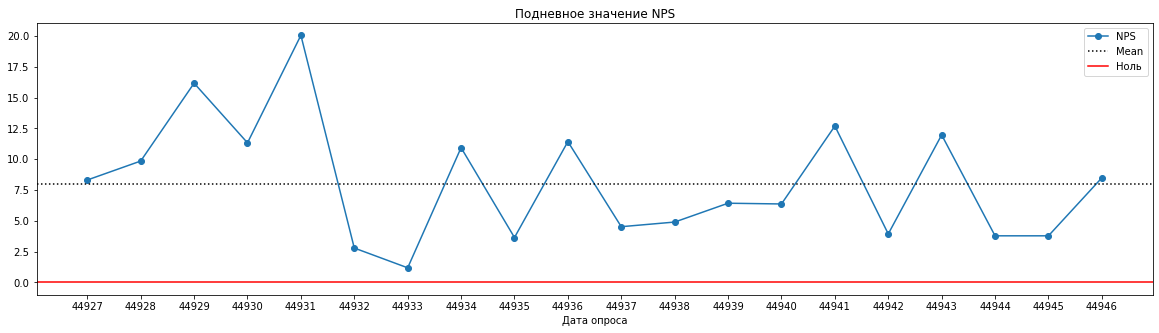

In [6]:
# NPS = (% Промоутеров) – (% Критиков) = mean

import matplotlib.pyplot as plt
date_list = df1['Дата опроса'].unique() # список дат

plt.figure(figsize = (20, 5))
plt.xticks(date_list)
(df1.groupby('Дата опроса')['prom'].mean()*100).plot(marker='o', label= 'NPS')
plt.axhline(y=df1['prom'].mean()*100, color='k', label= 'Mean', linestyle= 'dotted')
plt.axhline(y=0, color='r', label= 'Ноль')
plt.legend()
plt.title('Подневное значение NPS');

## Выводы

- NPS колеблется около среднего значения и за рассматриваемый период не демонстрирует тендеции положительного роста
- есть значительный положительный рост (+ 12%) на начальном этапе, значит то, что делалось тогда, было сделано правильно
- далее следует спад (на -19%) - значит что-то было очень плохо
- далее положительная тендеция периодически сменяется отрицательной
- в целом NPS имеет положительное значение и это хорошо, но при этом тендеции роста нет и есть огромный провал, и NPS так и не вернулось к наилучшим значениям (20%)